# Linear Regression Use case

In [1]:
# Importing the relevant libraries

# !pip install wget
import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Path
data_file_path = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

# Download the data file from the data path
wget.download(data_file_path)

 77% [.........................................................                 ] 1138688 / 1475504

100% [..........................................................................] 1475504 / 1475504

'data.csv'

In [3]:
# Load the data set: data.csv
data_df = pd.read_csv('data.csv')
df = data_df.copy()
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.shape

(11914, 16)

###  As can be seen that few column names are in capital and few in lower case. Also, few column names have `_` in between and few have spaces. Same is the case with values to. So, to make it standard, we will convert all upper case to lower case and will replace spaces with `_` 

In [5]:
# Treating column names
# 1. Converting into lower case, and 
# 2. Replacing spaces with '_'
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
# data types of each column
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
# Finding columns which have string values
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
# Treating values
# 1. Converting into lower case, and 
# 2. Replacing spaces with '_'
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory Data Analysis

In [9]:
# Number of unique values in each column
df.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

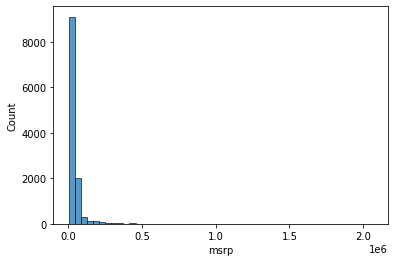

In [10]:
# Checking the distribution of target variable: msrp which stands for "Manufacturer's suggested retail price (MSRP)"
sns.histplot(df.msrp, bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

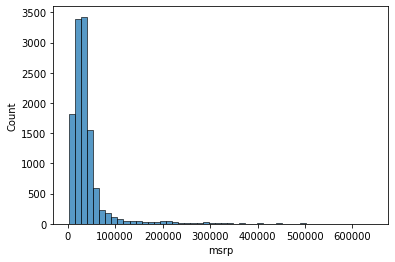

In [11]:
# As we can see there are points lying untill range of 2.0 x 1e6, but most of the points lies below 1.0 x 1e6
# Analysing below 1.0 x 1e6
sns.histplot(df.msrp[df.msrp < 1000000], bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

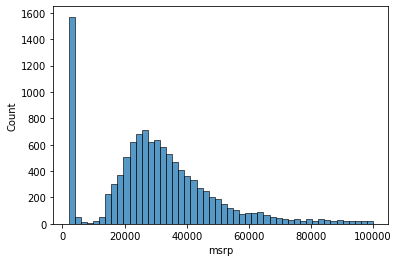

In [12]:
# Looking for distribution of prices i.e. msrp below 10000
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

### As can be seen from the above graphs that the graph is a tail towards right and hence, it's rightly skewed. Such tails are not good for an ML model, so to make our graph a bit compact we will take a log of all the value. But as log of 0 is not defined and there might be some value as 0 so we will first add 1 to all the values and then we'll take log of all the prices.

### Also, there is a large number of values initially which is just because it's the minimum value which is possible on the website.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

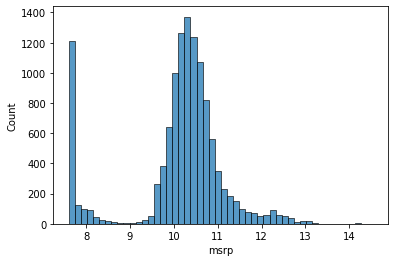

In [13]:
# Adding 1 and taking log of all the prices
log_prices = np.log1p(df.msrp)

# Plotting the distribution of log of prices
sns.histplot(log_prices, bins=50)

### The above graph shows a normal distrbution which is a good thing for any ML model

In [14]:
df.msrp = np.log1p(df.msrp)
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,10.739349
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,10.612779
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,10.500977
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,10.290483
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,10.448744


In [15]:
# Checking the number of missing values
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [16]:
# Checking the datatypes of all the columns
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                 float64
dtype: object

In [17]:
# Check the year in which this data was collected
df.year.max()

2017

In [18]:
# As from above we can see that in 2017 the data was collected and due to scaling instead of year we 
# will go with the age of cars
df['age'] = 2017 - df.year
df.drop(['year'], axis=1, inplace=True)
df.head()

,make,model,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,age
0,bmw,1_series_m,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,10.739349,6
1,bmw,1_series,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,10.612779,6
2,bmw,1_series,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,10.500977,6
3,bmw,1_series,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,10.290483,6
4,bmw,1_series,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,10.448744,6


In [19]:
# Checking the `make` column
df.make.value_counts()

chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyker    

In [20]:
# Checking the `model` column
df.model.value_counts()

silverado_1500        156
tundra                140
f-150                 126
sierra_1500            90
beetle_convertible     89
                     ... 
mkz_hybrid              1
m4_gts                  1
lfa                     1
horizon                 1
zephyr                  1
Name: model, Length: 914, dtype: int64

In [21]:
# Checking the `engine_fuel_type` column
df.engine_fuel_type.value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

It can be seen that most of the engine fuel types are top 5 names, so we will remove other columns developed after dummy encoding of this column

In [22]:
# Checking `engine_cylinders` column
df.engine_cylinders.value_counts()

4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: engine_cylinders, dtype: int64

In [23]:
# Checking `transmission_type` column
df.transmission_type.value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [24]:
# Checking `driven_wheels` column
df.driven_wheels.value_counts()

front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [25]:
# checking number of doors
df['number_of_doors'].value_counts()

4.0    8353
2.0    3160
3.0     395
Name: number_of_doors, dtype: int64

In [26]:
# Checking `market_category` column
df.market_category.value_counts()

crossover                                          1110
flex_fuel                                           872
luxury                                              855
luxury,performance                                  673
hatchback                                           641
                                                   ... 
crossover,exotic,luxury,performance                   1
exotic,luxury,high-performance,hybrid                 1
crossover,exotic,luxury,high-performance              1
flex_fuel,factory_tuner,luxury,high-performance       1
performance,hybrid                                    1
Name: market_category, Length: 71, dtype: int64

In [27]:
# Checking `vehicle_size` column
df.vehicle_size.value_counts()

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [28]:
# Checking `vehicle_style` column
df.vehicle_style.value_counts()

sedan                  3048
4dr_suv                2488
coupe                  1211
convertible             793
4dr_hatchback           702
crew_cab_pickup         681
extended_cab_pickup     623
wagon                   592
2dr_hatchback           506
passenger_minivan       417
regular_cab_pickup      392
2dr_suv                 138
passenger_van           128
cargo_van                95
cargo_minivan            71
convertible_suv          29
Name: vehicle_style, dtype: int64

In [29]:
# As can be seen from above that of all the categorical column only following needs dummy encoding
# 'number_of_doors', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'vehicle_size', 'vehicle_style'
dummy_cols = ['number_of_doors', 'engine_fuel_type', 'engine_cylinders', 'transmission_type', 'driven_wheels', 'vehicle_size', 'vehicle_style']

# Dummy encoding
# It can be seen from above that number_of_doors column is a categorical column
df = pd.get_dummies(df, columns=dummy_cols, drop_first=True)

df.head()

,make,model,engine_hp,market_category,highway_mpg,city_mpg,popularity,msrp,age,number_of_doors_3.0,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
0,bmw,1_series_m,335.0,"factory_tuner,luxury,high-performance",26,19,3916,10.739349,6,0,...,0,0,1,0,0,0,0,0,0,0
1,bmw,1_series,300.0,"luxury,performance",28,19,3916,10.612779,6,0,...,1,0,0,0,0,0,0,0,0,0
2,bmw,1_series,300.0,"luxury,high-performance",28,20,3916,10.500977,6,0,...,0,0,1,0,0,0,0,0,0,0
3,bmw,1_series,230.0,"luxury,performance",28,18,3916,10.290483,6,0,...,0,0,1,0,0,0,0,0,0,0
4,bmw,1_series,230.0,luxury,28,18,3916,10.448744,6,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
df.head()

,make,model,engine_hp,market_category,highway_mpg,city_mpg,popularity,msrp,age,number_of_doors_3.0,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
0,bmw,1_series_m,335.0,"factory_tuner,luxury,high-performance",26,19,3916,10.739349,6,0,...,0,0,1,0,0,0,0,0,0,0
1,bmw,1_series,300.0,"luxury,performance",28,19,3916,10.612779,6,0,...,1,0,0,0,0,0,0,0,0,0
2,bmw,1_series,300.0,"luxury,high-performance",28,20,3916,10.500977,6,0,...,0,0,1,0,0,0,0,0,0,0
3,bmw,1_series,230.0,"luxury,performance",28,18,3916,10.290483,6,0,...,0,0,1,0,0,0,0,0,0,0
4,bmw,1_series,230.0,luxury,28,18,3916,10.448744,6,0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
# Columns to remove from the dataframe are:
cols_to_remove = ['make', 'model', 'market_category', 
                  'engine_fuel_type_electric',
                   'engine_fuel_type_flex-fuel_(premium_unleaded_recommended/e85)',
                   'engine_fuel_type_flex-fuel_(premium_unleaded_required/e85)',
                   'engine_fuel_type_flex-fuel_(unleaded/natural_gas)',
                   'engine_fuel_type_natural_gas']
df.drop(cols_to_remove, axis=1, inplace=True)
df.head()

,engine_hp,highway_mpg,city_mpg,popularity,msrp,age,number_of_doors_3.0,number_of_doors_4.0,engine_fuel_type_flex-fuel_(unleaded/e85),engine_fuel_type_premium_unleaded_(recommended),...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
0,335.0,26,19,3916,10.739349,6,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,300.0,28,19,3916,10.612779,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,300.0,28,20,3916,10.500977,6,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,230.0,28,18,3916,10.290483,6,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,230.0,28,18,3916,10.448744,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [32]:
# dealing with null values:
df.isna().sum()

engine_hp                                          69
highway_mpg                                         0
city_mpg                                            0
popularity                                          0
msrp                                                0
age                                                 0
number_of_doors_3.0                                 0
number_of_doors_4.0                                 0
engine_fuel_type_flex-fuel_(unleaded/e85)           0
engine_fuel_type_premium_unleaded_(recommended)     0
engine_fuel_type_premium_unleaded_(required)        0
engine_fuel_type_regular_unleaded                   0
engine_cylinders_3.0                                0
engine_cylinders_4.0                                0
engine_cylinders_5.0                                0
engine_cylinders_6.0                                0
engine_cylinders_8.0                                0
engine_cylinders_10.0                               0
engine_cylinders_12.0       

In [33]:
# Filling null values
df['engine_hp'].fillna(df.engine_hp.mean(), inplace=True)

In [34]:
# Checking the number of null values
sum(df.isna().sum())

0

# Setting up Validation Framework

### For this we will be dividing our data for training, validation, and testing. So, 20% will go for validation, another 20% will go for testing, and then the remaining will go into training

In [35]:
N = df.shape[0]
n_val = int(0.2*N)
n_test = int(0.2*N)
n_train = N - (n_val + n_test)

In [36]:
# Sizes of each part are:
N, n_train, n_val, n_test

(11914, 7150, 2382, 2382)

In [37]:
# Splitting of data
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val: n_val+n_test] 
df_train = df.iloc[n_val+n_test:]

In [38]:
# Checking validation dataset
df_val

,engine_hp,highway_mpg,city_mpg,popularity,msrp,age,number_of_doors_3.0,number_of_doors_4.0,engine_fuel_type_flex-fuel_(unleaded/e85),engine_fuel_type_premium_unleaded_(recommended),...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
0,335.0,26,19,3916,10.739349,6,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,300.0,28,19,3916,10.612779,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,300.0,28,20,3916,10.500977,6,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,230.0,28,18,3916,10.290483,6,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,230.0,28,18,3916,10.448744,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,570.0,21,14,1715,11.965916,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2378,240.0,29,20,1715,11.039733,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2379,520.0,21,14,1715,11.665655,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2380,300.0,24,18,1715,10.995428,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Checking train dataset
df_train

,engine_hp,highway_mpg,city_mpg,popularity,msrp,age,number_of_doors_3.0,number_of_doors_4.0,engine_fuel_type_flex-fuel_(unleaded/e85),engine_fuel_type_premium_unleaded_(recommended),...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
4764,287.0,23,16,5657,10.540091,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4765,365.0,21,15,5657,10.669676,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4766,287.0,22,16,5657,10.601150,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4767,287.0,23,16,5657,10.396078,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4768,287.0,23,16,5657,10.551402,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,300.0,23,16,204,10.739024,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,300.0,23,16,204,10.945018,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,300.0,23,16,204,10.832122,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11912,300.0,23,16,204,10.838031,4,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


### As it can be seen from above two cells thatall bmw and porche went into validation dataset. Similarly, all ford, acura, etc. went into training dataset. This type of situation is not good as with this ML model will be trained only on the car model in the training, so we need to <b>shuffle up</b> so that our model become general

In [40]:
idx = np.arange(N)
# Setting the seed
np.random.seed(2)

# Creating shuffled indexes values
np.random.shuffle(idx)
idx # Shuffled numbers from 0 to N-1

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [41]:
# Index values for train, validation, and test
train_idx = idx[:n_train]
validation_idx = idx[n_train:n_train+n_val]
test_idx = idx[n_train+n_val:]

In [42]:
# Shuffled data
df_val = df.iloc[validation_idx]
df_test = df.iloc[test_idx] 
df_train = df.iloc[train_idx]

In [43]:
# Shuffled validation dataset
df_val.head()

,engine_hp,highway_mpg,city_mpg,popularity,msrp,age,number_of_doors_3.0,number_of_doors_4.0,engine_fuel_type_flex-fuel_(unleaded/e85),engine_fuel_type_premium_unleaded_(recommended),...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
2779,200.0,25,19,1385,10.199361,2,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3708,241.0,29,22,617,10.908723,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4794,160.0,36,26,5657,9.727705,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
10498,290.0,34,21,204,10.659633,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1880,170.0,34,25,873,10.165698,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [44]:
# Shuffled train dataset
df_train.head()

,engine_hp,highway_mpg,city_mpg,popularity,msrp,age,number_of_doors_3.0,number_of_doors_4.0,engine_fuel_type_flex-fuel_(unleaded/e85),engine_fuel_type_premium_unleaded_(recommended),...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
2735,148.0,33,24,1385,9.575747,9,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6720,132.0,32,25,2031,9.887663,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5878,148.0,37,28,640,9.893235,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11190,90.0,18,16,873,7.601402,26,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4554,385.0,21,15,5657,10.937757,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
df_train.shape, df_val.shape, df_test.shape

((7150, 44), (2382, 44), (2382, 44))

In [46]:
# As it can be seen that the indexes of df_train, df_val, and df_test is random, so we need to reset the indexes of all these
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [47]:
# target variable
y_train = df_train.msrp
y_val = df_val.msrp
y_test = df_test.msrp

# Removing Target variable from the respective dataframes
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [48]:
df_train.shape, df_val.shape, df_test.shape

((7150, 43), (2382, 43), (2382, 43))

# Linear Regression

$$
Xw = y \\
(X^{T}X)w = X^{T}y \\
(X^{T}X)^{-1}*(X^{T}X)w = (X^{T}X)^{-1}X^{T}y \\
I*w = (X^{T}X)^{-1}X^{T}y \\
w = (X^{T}X)^{-1}X^{T}y
$$

In [49]:
def train_linear_regression(X, y):
    # Converting dataframe into numpy array
    X = np.array(X)
    y = np.array(y)
    
    # Getting 1's array
    ones = np.ones(X.shape[0])
    # Putting it in the first column
    X = np.column_stack([ones, X])
    
    # Now applying big formula to find the w as shown above
    # Finding transpose(X)*X
    XTX = X.T.dot(X)
    
    # taking inverse of XTX
    XTX_inv = np.linalg.inv(XTX)
    
    # W final
    w_final = XTX_inv.dot(X.T).dot(y)
        
    bias = w_final[0]
    features_weights = w_final[1:]
    
    return bias, features_weights

In [50]:
def rmse(y, y_pred):
    n = len(y)
    return np.sqrt((1/n)*sum((y-y_pred)**2))
    

In [51]:
w0, w_rest = train_linear_regression(df_train, y_train)

In [52]:
w0, w_rest

(11.005242405422758,
 array([ 1.70412409e-03, -6.07573987e-03, -9.72761443e-03, -2.07473577e-05,
        -9.69446898e-02,  3.83887132e-02,  2.10405902e-01, -3.53444338e-01,
        -2.33235819e-01,  1.33231291e-01, -3.67789539e-01, -2.54283809e-01,
        -2.98545265e-02, -4.68992022e-02,  1.18101866e-01,  2.27155919e-01,
         4.96511102e-01,  1.23598993e+00,  2.56743809e+00, -4.98885082e-02,
         1.25479705e+00, -2.15826561e-01, -6.41594293e-01,  5.34617868e-02,
        -1.35785789e-02, -1.65694813e-03, -8.30611658e-02, -9.30003109e-02,
        -2.00019397e-01, -2.84512823e-01, -1.48271369e-01, -1.36835773e-01,
        -5.27964349e-01,  2.20799913e-01,  2.71885041e-01,  2.16834606e-02,
        -2.84545554e-01, -3.31350519e-01, -6.21212809e-02, -3.62963062e-01,
        -2.72560133e-01, -2.09365660e-01, -9.72262674e-02]))

In [53]:
# Validation dataset prediction
y_pred = w0 + np.array(df_val).dot(w_rest)
y_pred

array([10.27170918, 10.97445941, 10.07722608, ..., 10.60213912,
       10.08541537, 10.59885246])

In [54]:
rmse(y_val, y_pred)

0.44589806660970405

Text(0.5, 1.0, 'Predictions vs actual distribution')

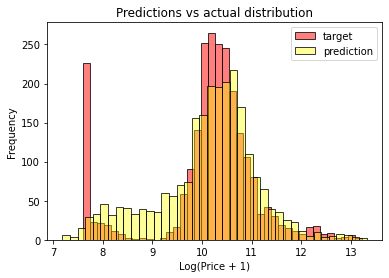

In [55]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='red', alpha=0.5, bins=40)
sns.histplot(y_pred, label='prediction', color='yellow', alpha=0.4, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

In [56]:
# On test dataset
# Test dataset prediction
y_test_pred = w0 + np.array(df_test).dot(w_rest)
y_test_pred

array([ 7.98706694,  9.88581038, 10.4256436 , ...,  9.77744028,
       10.04932128, 10.54529126])

In [57]:
rmse(y_test, y_test_pred)

0.44457537313924356

Text(0.5, 1.0, 'Predictions vs actual distribution')

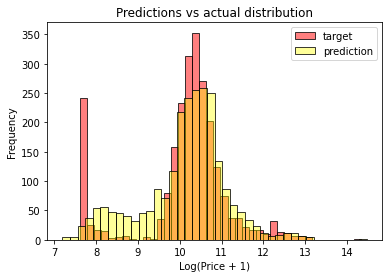

In [58]:
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='red', alpha=0.5, bins=40)
sns.histplot(y_test_pred, label='prediction', color='yellow', alpha=0.4, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')